In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. Eksplorasi Data awal

In [ ]:
# Load data kita ke sebuah dataframe
data = pd.read_csv('grocery_dataset_with_issues.csv')

In [ ]:
# tampilkan jumlah baris dan data
data.shape

(5000, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    5000 non-null   object 
 1   Category   5000 non-null   object 
 2   Price      4262 non-null   float64
 3   City       5000 non-null   object 
 4   OrderDate  4854 non-null   object 
 5   Discount   5000 non-null   float64
 6   Profit     5000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 273.6+ KB


In [ ]:
# tampilkan 10 baris pertama
data.head(10)

,OrderID,Category,Price,City,OrderDate,Discount,Profit
0,ccd8a575,Meat,NaN,Houston,2023-12-16,0.42,4.80
1,7daa9d0e,Seafood,91.96,Houston,2023-11-17,0.43,86.15
2,43fd0737,Maat,NaN,Chicago,2023-04-15,0.31,26.77
3,dc59b78a,Bakery,80.90,New York,2023-12-18,0.33,-30.45
4,3c4975c5,Maat,NaN,Chicago,2023-12-29,0.40,21.85
5,2972afb8,Bakry,NaN,Chicago,2023-12-27,0.45,51.89
6,45cc3746,Snacks,316.16,Los Angeles,2023-08-21,0.44,26.89
7,753b536f,Seafood,370.07,Houston,2023-03-19,0.17,38.91
8,18f05a1a,Householdd,61.52,New York,2023-02-21,0.00,-16.43
9,0e0cf55f,Bakry,430.51,Houston,2023-09-30,0.22,-40.50


## 2. Pengecekan missing value

In [ ]:
# lihat informasi dari data kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    5000 non-null   object 
 1   Category   5000 non-null   object 
 2   Price      4262 non-null   float64
 3   City       5000 non-null   object 
 4   OrderDate  4854 non-null   object 
 5   Discount   5000 non-null   float64
 6   Profit     5000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 273.6+ KB


Terdapat 2 kolom yang memiliki missing values. Kita akan investigasi lebih lanjut

In [ ]:
# hitung jumlah missing value di tiap kolom
data.isna().sum()

,0
OrderID,0
Category,0
Price,738
City,0
OrderDate,146
Discount,0
Profit,0


In [ ]:
# hitung proporsi missing value di tiap kolom
(data.isna().sum() / data.shape[0]) * 100

,0
OrderID,0.00
Category,0.00
Price,14.76
City,0.00
OrderDate,2.92
Discount,0.00
Profit,0.00


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom
data[data['Price'].isna()].head(10)

,OrderID,Category,Price,City,OrderDate,Discount,Profit
0,ccd8a575,Meat,NaN,Houston,2023-12-16,0.42,4.80
2,43fd0737,Maat,NaN,Chicago,2023-04-15,0.31,26.77
4,3c4975c5,Maat,NaN,Chicago,2023-12-29,0.40,21.85
5,2972afb8,Bakry,NaN,Chicago,2023-12-27,0.45,51.89
10,f37f7e5b,Sneks,NaN,Chicago,2023-07-16,0.46,27.11
11,d456a81f,Seafood,NaN,Chicago,2023-08-11,0.37,0.15
14,a016ef56,Meat,NaN,Chicago,2023-07-12,0.34,89.48
18,7305ecdc,Sneks,NaN,New York,2023-01-14,0.25,31.01
27,68ce2828,Householdd,NaN,Los Angeles,2023-08-19,0.45,-21.53
38,86798c28,Bakry,NaN,New York,2023-06-06,0.14,36.48


In [ ]:
data[data['OrderDate'].isna()].head(10)

,OrderID,Category,Price,City,OrderDate,Discount,Profit
54,8bd2c9cb,Seafood,141.79,Houston,NaN,0.10,-4.09
68,d4a67cfa,Meat,284.73,New York,NaN,0.04,-8.66
69,e86a3620,Seafood,288.02,Los Angeles,NaN,0.27,25.19
77,84cfb25d,Householdd,187.58,Chicago,NaN,0.35,55.55
81,26734dfd,Sea food,139.11,Chicago,NaN,0.43,15.83
90,c0794b0c,Snacks,220.81,Chicago,NaN,0.09,72.21
92,91d9ab15,Seafood,5.03,New York,NaN,0.28,-15.48
151,850136fc,Householdd,62.60,New York,NaN,0.13,70.49
224,be1455c7,Maat,359.94,New York,NaN,0.02,-27.93
264,0484f12e,Householdd,73.18,New York,NaN,0.16,-32.39


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di kedua kolom sekaligus
data[(data['Price'].isnull()) & (data['OrderDate'].isnull())].shape

(20, 7)

## Pembersihan Data

### Pengecekan duplikat

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita
print(f"Jumlah data duplikat: {data.duplicated().sum()}")

Jumlah data duplikat: 0


Tidak ada data duplikat

### Pengecekan kolom *Category*

In [ ]:
# mari kita lihat isi dari kolom Category
data['Category'].unique()

array(['Meat', 'Seafood', 'Maat', 'Bakery', 'Bakry', 'Snacks',
       'Householdd', 'Sneks', 'Household', 'Sea food'], dtype=object)

In [ ]:
# mari kita lihat isi dari kolom Category
data['Category'].value_counts()

,count
Category,
Maat,520
Householdd,520
Meat,516
Snacks,514
Sea food,506
Bakery,502
Bakry,502
Household,492
Seafood,473


In [ ]:
# mari kita samakan value di kolom Category menjadi lowercase
data['Category'] = data['Category'].str.lower()

In [ ]:
# lakukan pengecekan kembali ke kolom Category
data['Category'].value_counts()

,count
Category,
maat,520
householdd,520
meat,516
snacks,514
sea food,506
bakery,502
bakry,502
household,492
seafood,473


Menyamakan category

In [ ]:
data['Category'] = data['Category'].replace('sneks', 'snacks')
data['Category'] = data['Category'].replace('maat', 'meat')
data['Category'] = data['Category'].replace('householdd', 'household')
data['Category'] = data['Category'].replace('bakry', 'bakery')
data['Category'] = data['Category'].replace('sea food', 'seafood')


data['Category'].value_counts()

,count
Category,
meat,1036
household,1012
bakery,1004
seafood,979
snacks,969


### Pengecekan kolom *Price*

In [ ]:
# mari kita lihat missing values dari Price
data['Price'].isna().sum()

738

karena kolom price memiliki lebih dari 10% missing values maka kolom price yang kosong akan diisi dengan median atau mean

[]

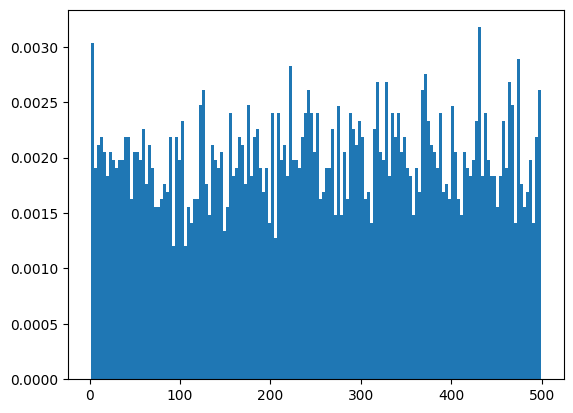

In [ ]:
#Imputasi Missing values, cek terlebih dahulu distribusi data tiap kolom
plt.hist(data['Price'], density=True, bins=150)
plt.plot()

berdasarkan plot diatas isi missing values dengan rata rata atau mean

In [ ]:
mean_price = data['Price'].mean()
print(f"Nilai mean untuk kolom price : {mean_price}")

Nilai mean untuk kolom price : 253.06311356170812


In [ ]:
#isi missing values dengan mean
data['Price'] = data['Price'].fillna(mean_price)

In [ ]:
#Cek missing values kembali
data['Price'].isna().sum()

0

In [ ]:
data.isna().sum()

,0
OrderID,0
Category,0
Price,0
City,0
OrderDate,146
Discount,0
Profit,0


Sudah tidak ada Price yang null (missing values)

### Pengecekan kolom *City*

In [ ]:
data['City'].value_counts()

,count
City,
Chicago,1272
Houston,1263
New York,1247
Los Angeles,1218


Tidak ada masalah

### Pengecekan Kolom *OrderDate*

In [ ]:
data['OrderDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: OrderDate
Non-Null Count  Dtype 
--------------  ----- 
4854 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


Karena tabel OrderDate masih dalam berbentuk objek maka tipe data diganti menjadi date

In [ ]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['OrderDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: OrderDate
Non-Null Count  Dtype         
--------------  -----         
4854 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


Kemudian drop date yang masih memiliki nilai null

In [ ]:
# mari kita lihat missing values dari Price
data['OrderDate'].isna().sum()

146

karena hanya ada 146 yang dimana kurang dari 10% dari data maka missing values dapat di drop

In [ ]:
# Drop Missing Values
data = data.dropna(subset=['OrderDate'])
data.isna().sum()

,0
OrderID,0
Category,0
Price,0
City,0
OrderDate,0
Discount,0
Profit,0


In [ ]:
data.shape

(4854, 7)

data sudah tidak memiliki missing values

### Pengecekan kolom *Discount*

Selain missing values, terdapat keanehan lain di kolom days_employed dimana terdapat nilai negatif. Hal ini tidak wajar karena jumlah hari seseorang bekerja seharusnya tidak bisa negatif. Mari kita atasi hal ini

In [ ]:
#cek apakah ada yang aneh?
data['Discount'].unique()

array([0.42, 0.43, 0.31, 0.33, 0.4 , 0.45, 0.44, 0.17, 0.  , 0.22, 0.46,
       0.37, 0.34, 0.49, 0.19, 0.25, 0.47, 0.27, 0.14, 0.26, 0.04, 0.07,
       0.36, 0.03, 0.05, 0.08, 0.48, 0.21, 0.29, 0.12, 0.18, 0.06, 0.38,
       0.39, 0.15, 0.2 , 0.23, 0.02, 0.16, 0.35, 0.1 , 0.11, 0.24, 0.3 ,
       0.01, 1.03, 0.28, 0.32, 0.5 , 0.13, 0.96, 0.41, 0.09, 0.91, 0.52,
       1.02, 1.04, 0.59, 0.63, 0.58, 0.78, 0.94, 1.22, 1.35, 1.48, 0.61,
       1.47, 1.08, 0.99, 0.51, 1.39, 0.62, 1.32, 1.31, 1.38, 0.64, 1.14,
       1.43, 1.37, 1.13, 0.92, 1.44, 0.7 , 1.1 , 1.33, 0.68, 0.85, 0.57,
       0.79, 0.95, 0.89, 1.42])

Karena discount tidak mungkin >1 atau >100% maka perlu kita cek ada berapa discount yang memiliki lebih dari 100%

In [ ]:
# cek discount > 1
data[data['Discount'] > 1].shape

(27, 7)

karena hanya ada 27 data yang memiliki discount > 100% maka 27 data tersebut dapat di drop

In [ ]:
# ambil data yang memiliki discount <=1
data = data[data['Discount'] <= 1]

In [ ]:
# cek discount > 1
data[data['Discount'] > 1].shape

(0, 7)

sudah tidak ada discount yang memiliki > 1

## Mengatasi outlier

Kita akan gunakan metoda IQR untuk mencek nilai2 outlier di data kita, untuk kolom days_employed dan kolom total_income. Untuk mempermudah analisis dan pengerjaan, kita akan buat suatu fungsi yang dapat menerima input nama kolom dan juga apakah kita mau menghitung upper bound ataupun lower bound

In [ ]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [ ]:
# kolom profit
upper_total_profit = cek_outlier('Profit', 'upper_bound')
lower_total_profit = cek_outlier('Profit', 'lower_bound')
print(f"Jumlah total outlier di kolom Profit : {len(upper_total_profit) + len(lower_total_profit)}")

Jumlah total outlier di kolom Profit : 0


In [ ]:
# kolom diskon
upper_diskon = cek_outlier('Discount', 'upper_bound')
lower_diskon = cek_outlier('Discount', 'lower_bound')
print(f"Jumlah total outlier di kolom diskon : {len(upper_diskon) + len(lower_diskon)}")

Jumlah total outlier di kolom diskon : 14


In [ ]:
#kolom price
upper_price = cek_outlier('Price', 'upper_bound')
lower_price = cek_outlier('Price', 'lower_bound')
print(f"Jumlah total outlier di kolom price: {len(upper_price) + len(lower_price)}")

Jumlah total outlier di kolom price: 0


In [ ]:
#kolom Date
upper_date = cek_outlier('OrderDate', 'upper_bound')
lower_date = cek_outlier('OrderDate', 'lower_bound')
print(f"Jumlah total outlier di kolom OrderDate: {len(upper_date) + len(lower_date)}")

Jumlah total outlier di kolom OrderDate: 0


In [ ]:
# mari kita buat sebuah fungsi yang dapat menerima input sebuah data frame
# dan juga nama kolom untuk filter / menghapus data outlier
def filter_outlier(df, nama_kolom):
    if nama_kolom == 'Discount':
        data_temp = df.loc[~df.index.isin(upper_diskon)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_diskon)]
        return data_temp


In [ ]:
# buat dataframe baru dengan memanggil fungsi filter_outlier
data = filter_outlier(data, 'Discount')
print(data.shape)

(4814, 7)


In [ ]:
# final data
data.head(10)


,OrderID,Category,Price,City,OrderDate,Discount,Profit
0,ccd8a575,meat,253.063114,Houston,2023-12-16,0.42,4.80
1,7daa9d0e,seafood,91.960000,Houston,2023-11-17,0.43,86.15
2,43fd0737,meat,253.063114,Chicago,2023-04-15,0.31,26.77
3,dc59b78a,bakery,80.900000,New York,2023-12-18,0.33,-30.45
4,3c4975c5,meat,253.063114,Chicago,2023-12-29,0.40,21.85
5,2972afb8,bakery,253.063114,Chicago,2023-12-27,0.45,51.89
6,45cc3746,snacks,316.160000,Los Angeles,2023-08-21,0.44,26.89
7,753b536f,seafood,370.070000,Houston,2023-03-19,0.17,38.91
8,18f05a1a,household,61.520000,New York,2023-02-21,0.00,-16.43
9,0e0cf55f,bakery,430.510000,Houston,2023-09-30,0.22,-40.50
